<a href="https://colab.research.google.com/github/vedvkandge2000/-MERN-Projects/blob/master/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries for data visualization
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pattern and Data Mining/Loan_Prediction/lending_club_loan_two.csv')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
df.info()
# From this we can see that there are many missing and null values in data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='count', ylabel='loan_status'>

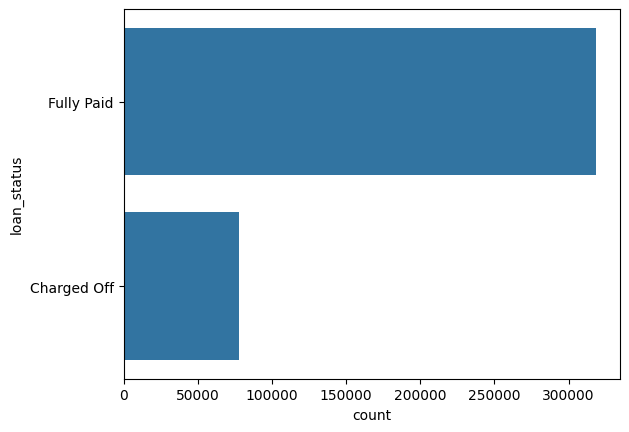

In [ ]:
# Do smoe data analysis.
# Since we are going to predict loan status let's plot a countmap on this
sns.countplot(df['loan_status'])

(array([4.2620e+03, 8.4330e+03, 1.2527e+04, 2.6213e+04, 2.1650e+04,
        1.8945e+04, 2.2140e+04, 1.6424e+04, 3.9178e+04, 1.2073e+04,
        2.8333e+04, 1.4873e+04, 2.6893e+04, 1.4963e+04, 7.4560e+03,
        1.4566e+04, 6.1640e+03, 2.2873e+04, 8.2210e+03, 6.0600e+03,
        1.1086e+04, 1.1654e+04, 2.5050e+03, 2.4980e+03, 6.6640e+03,
        1.7120e+03, 7.8580e+03, 2.2150e+03, 1.2940e+03, 1.0900e+03,
        1.4950e+04, 5.2000e+01, 9.0000e+00, 1.1000e+01, 1.8500e+02]),
 array([  500.        ,  1628.57142857,  2757.14285714,  3885.71428571,
         5014.28571429,  6142.85714286,  7271.42857143,  8400.        ,
         9528.57142857, 10657.14285714, 11785.71428571, 12914.28571429,
        14042.85714286, 15171.42857143, 16300.        , 17428.57142857,
        18557.14285714, 19685.71428571, 20814.28571429, 21942.85714286,
        23071.42857143, 24200.        , 25328.57142857, 26457.14285714,
        27585.71428571, 28714.28571429, 29842.85714286, 30971.42857143,
        32100.    

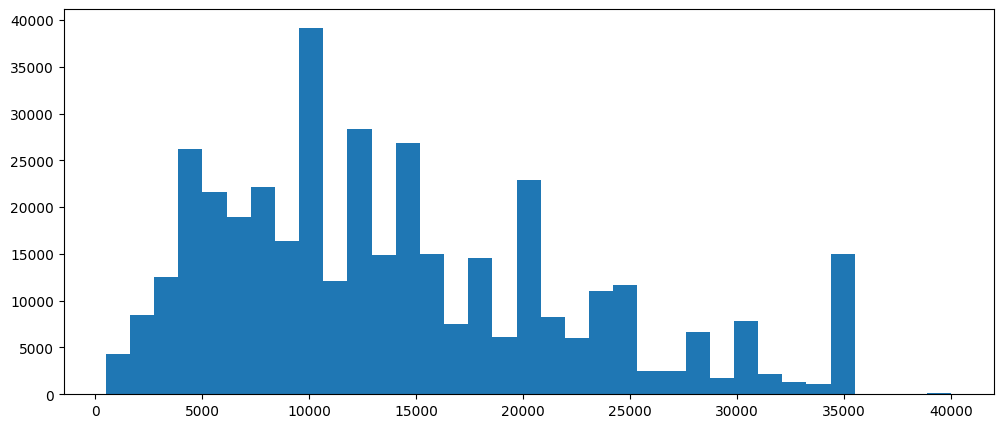

In [ ]:
# Let's explore some another features.
plt.figure(figsize=(12,5))
plt.hist(df['loan_amnt'],bins=35)

In [ ]:
# Let's find the coorelation between features.
# Assuming 'df' is your DataFrame
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation for numeric columns
print(correlation_matrix)

                      loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.05745

<Axes: >

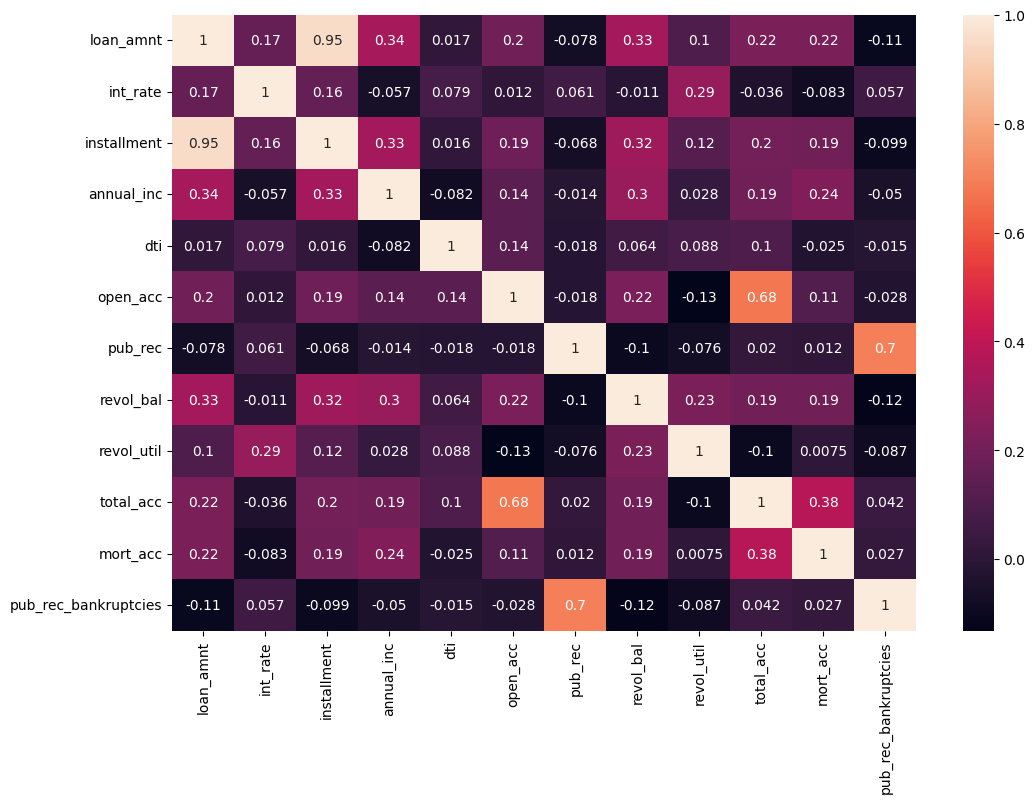

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True)
# From this we can see that the relation between which two feature is stronger.

<Axes: xlabel='installment', ylabel='loan_amnt'>

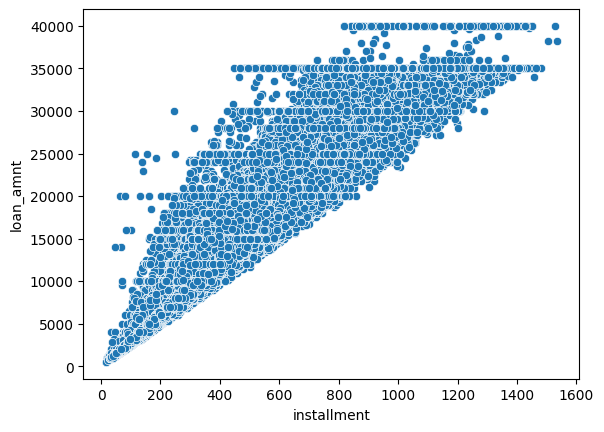

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
# From this we can say that as loan amount increases installments also increases but for some points loan amount is same but number of
# installments are different this means that there may be chances of duplicate data.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

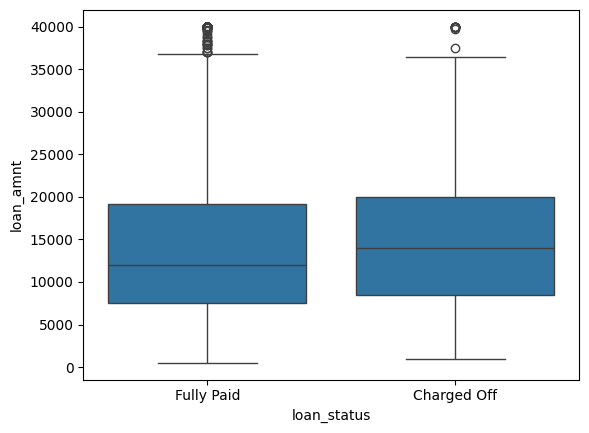

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# From this we can say that if loan amnt is near to the 1lakh then mostly it will be fully paid and if it is near to the 1.5L then it mostly
# changred off

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
sub_grade_order = sorted(df['sub_grade'].unique())
sub_grade_order

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

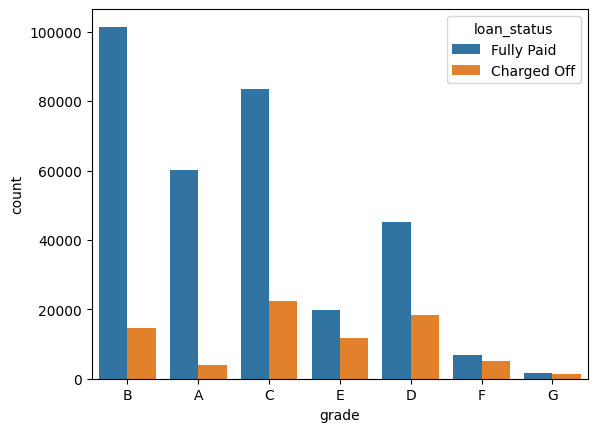

In [ ]:
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

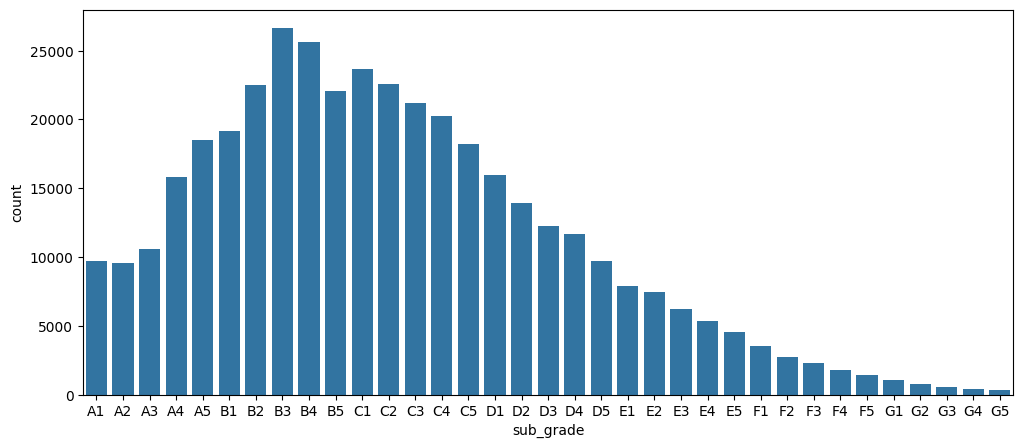

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',order=sub_grade_order,data=df)

<Axes: xlabel='sub_grade', ylabel='count'>

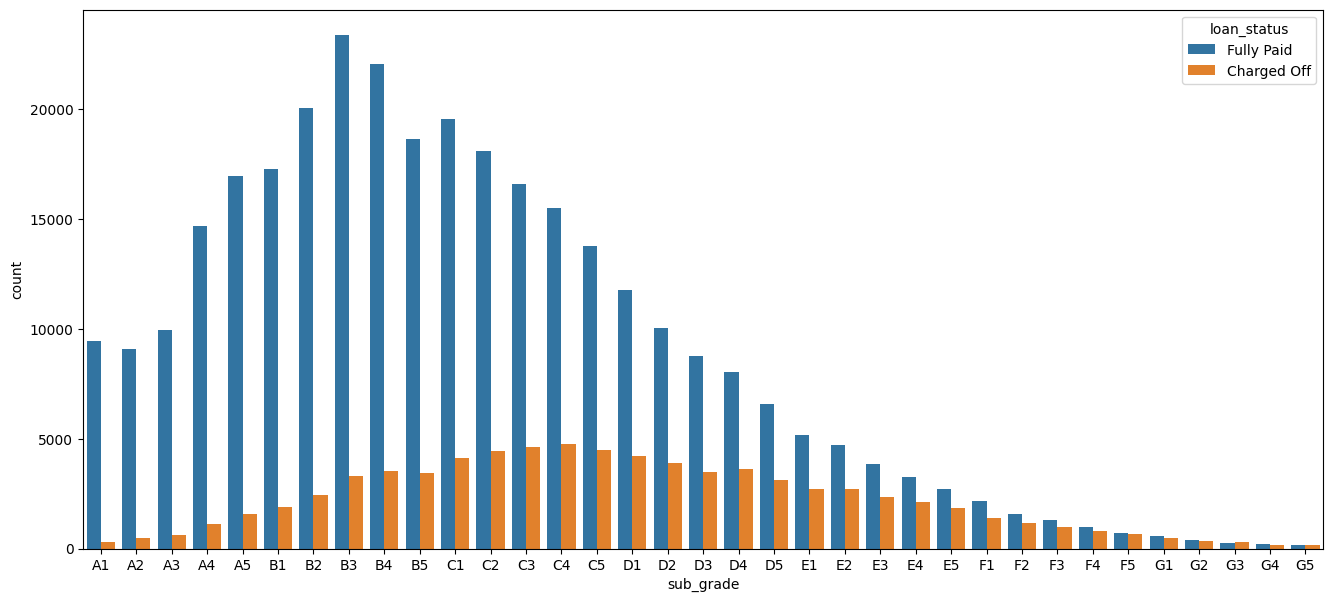

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x='sub_grade',data=df, order=sub_grade_order,hue='loan_status')

# This shows that F and G grade are not get paid that much
# So isolate them  and plot sepretely.

<Axes: xlabel='sub_grade', ylabel='count'>

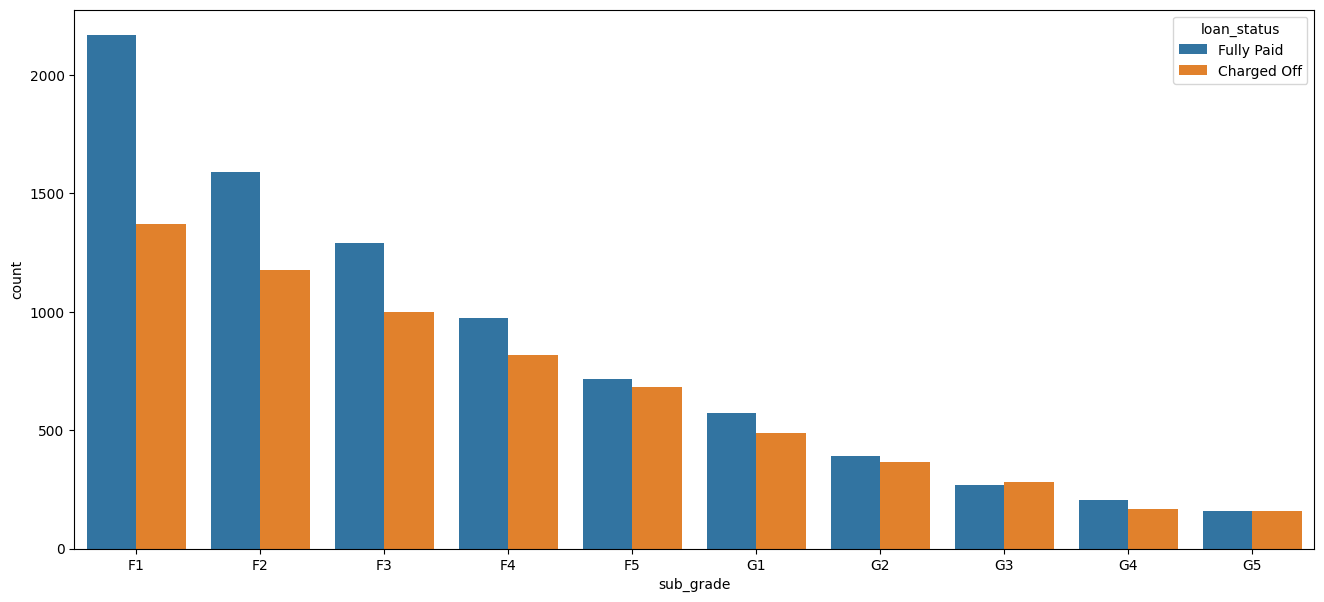

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x='sub_grade',data=df, order=sub_grade_order[25:],hue='loan_status')

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [ ]:
df[['loan_repaid','loan_status']]
# So now we have converted a text data into numrical form so now we can corelate this data with the other features.
# loan_repaid is the lable which we are going to predict.

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

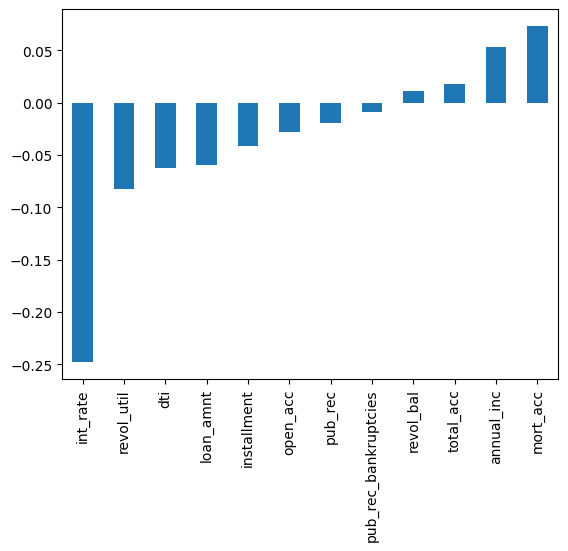

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation for numeric columns
numeric_df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
df.isnull().sum()/len(df)*100
# So there is much more missing data in this so either we can remove them or we can creat dummy variables.
# Let's see emp_title and emp_length first.

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
Postman,1
"McCarthy & Holthus, LLC",1
jp flooring,1


In [ ]:
# So here we can not apply lable encoading because there is not a specific values or strings.
# So we can delete the column.

In [ ]:
df = df.drop('emp_title',axis=1)

In [ ]:
#sorted(df['emp_length'].dropna().unique())

In [ ]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

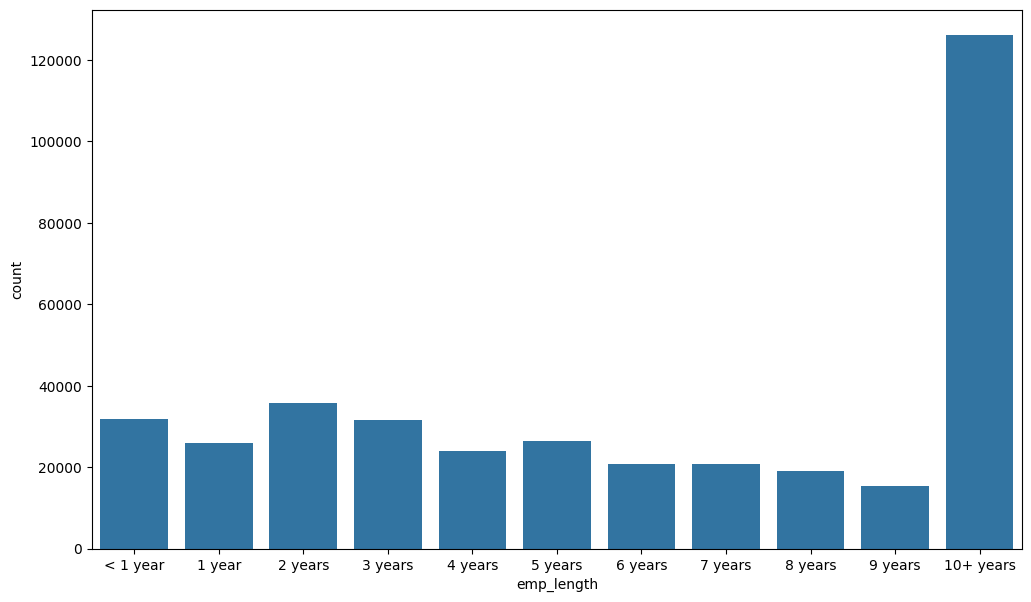

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

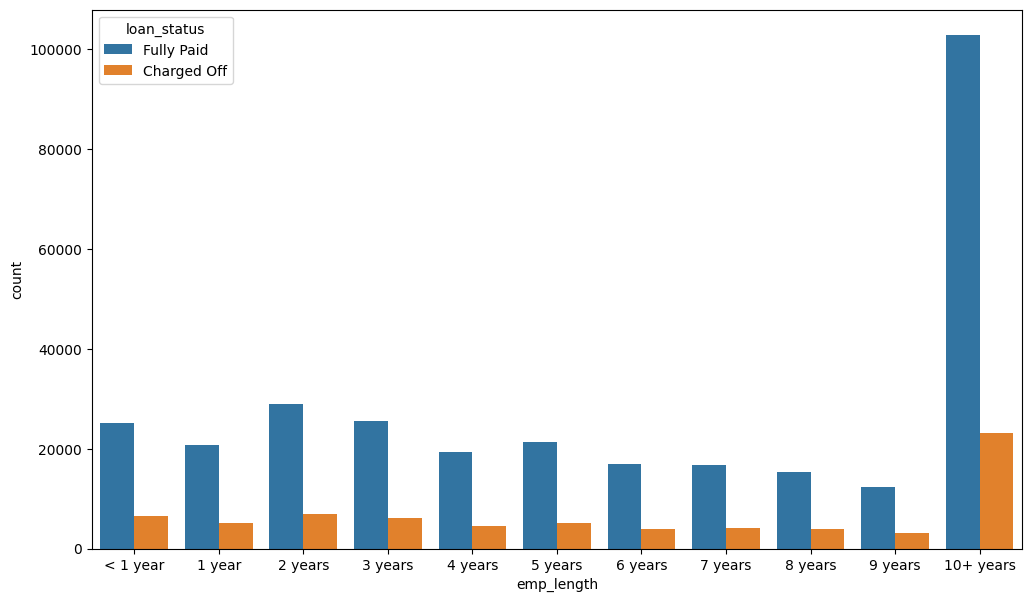

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [ ]:
# This info does not strongly inform us that the there is a strong relation between emp_length and being charged off.
# So now we will find the percentage of people being chnaged of and then plot a bar garph for each emp_length category.
emp_co = df[df['loan_status']=="Charged Off"].groupby('emp_length').count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby('emp_length').count()['loan_status']

In [ ]:
emp_len = emp_co/emp_fp
emp_len

,loan_status
emp_length,
1 year,0.248649
10+ years,0.225770
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625


<Axes: xlabel='emp_length'>

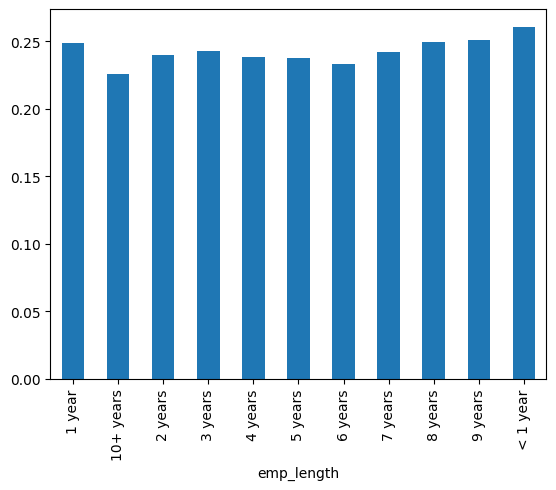

In [ ]:
emp_len.plot(kind='bar')
# So From this bar plot we can say that the percentage of people chagred off are almost same for all categories of emp_len.
# So we may say that emp_len is not strongly related to the loan_status so we can drop this column.

In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
# Now let's see the title and purpoae column.
df['title'].head(10)

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance
5,Debt consolidation
6,Home improvement
7,No More Credit Cards
8,Debt consolidation
9,Debt Consolidation


In [ ]:
df['purpose'].head(10)

,purpose
0,vacation
1,debt_consolidation
2,credit_card
3,credit_card
4,credit_card
5,debt_consolidation
6,home_improvement
7,credit_card
8,debt_consolidation
9,debt_consolidation


In [ ]:
# So here we see that the data in these two column is almost same so we can drop column with large missing values

In [ ]:
df= df.drop('title',axis=1)

In [ ]:
# Now we will see morr_acc column which gives the information about number mortgage accounts.
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,139777
1.0,60416
2.0,49948
3.0,38049
4.0,27887
5.0,18194
6.0,11069
7.0,6052
8.0,3121


In [ ]:
# Now we can deal with missing data either by linear approach or by find relation with other columns and many more.
# Let's find out the corelation os mort_acc with other features.
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation for numeric columns
correlation_matrix['mort_acc'].sort_values()

,mort_acc
int_rate,-0.082583
dti,-0.025439
revol_util,0.007514
pub_rec,0.011552
pub_rec_bankruptcies,0.027239
loan_repaid,0.073111
open_acc,0.109205
installment,0.193694
revol_bal,0.194925
loan_amnt,0.222315


In [ ]:
# So this shows that there is a strong relation between total_acc and mort_acc so now we can fill the nan values in mort_acc by taking mean
# For each category of total_acc and replace the same.
mort_total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

In [ ]:
def fill_mort_acc(mort,total):
  if(np.isnan(mort)):
    return mort_total_acc_avg[total]
  else:
    return mort

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['mort_acc'],x['total_acc']),axis=1)

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
len(df)
(276/len(df))*100 + ((535/len(df))*100)

0.20478246597479988

In [ ]:
# So here we see that the in revol_util and pub_rec_bankrupties nearly 0.2% percent of  data is missing so we remove that rows by dropna()
# which will not bother that much.
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
# Now we are going to work on categorical data.
df.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
home_ownership,object
annual_inc,float64
verification_status,object
issue_d,object


In [ ]:
# loc gets rows (or columns) with particular labels from the index. iloc gets rows (or columns) at particular positions in the index
# (so it only takes integers).

In [ ]:
df['term'] = df['term'].apply(lambda term: int(term[:2]))

In [ ]:
# Since we know that grade is part of subgrade so drop the grade column.
df = df.drop('grade',axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
# Now we can do this with getdummies or one hot encoding or lable encoading to the subgrade column.


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# sub_grade = np.array(df['sub_grade']).reshape(-1,1)
# OH_subgrade = pd.DataFrame(OH_encoder.fit_transform(sub_grade))

In [ ]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

In [ ]:
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198022
RENT,159395
OWN,37660
OTHER,110
NONE,29
ANY,3


In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198022
RENT,159395
OWN,37660
OTHER,142


In [ ]:
home_owner_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('home_ownership',axis=1),home_owner_dummies],axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [ ]:
df['zip_coad'] = df['address'].apply(lambda address: address[-5:])

In [ ]:
zip_coad_dummies = pd.get_dummies(df['zip_coad'],drop_first=True)
zip_coad_dummies

,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,True,False,False,False,False
396026,True,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,True,False,False
396028,False,False,False,True,False,False,False,False,False


In [ ]:
df = pd.concat([df.drop(['address','zip_coad'],axis=1),zip_coad_dummies],axis=1)

In [ ]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
df['earliest_cr_line'] =df['earliest_cr_line'].apply(lambda line: int(line[-4:]))

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,3,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,...,True,False,False,True,False,False,False,False,False,False
1,8000.0,3,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,3,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,0.0,...,True,True,False,False,False,False,False,False,False,False
3,7200.0,3,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,0.0,...,True,False,False,False,False,False,False,False,False,False
4,24375.0,6,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,0.0,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Now here we split our data into train and test data.
from sklearn.model_selection import train_test_split

In [ ]:
accList = []
modelList = []

In [ ]:
df = df.drop('loan_status',axis=1)

In [ ]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Random Forest Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

#Hyperparameter tuning for Random forest
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees
    'max_depth': [10, 12, 15, 20],           # Tree depth
    'min_samples_split': [5, 10, 15],        # Minimum samples required to split
    'min_samples_leaf': [2, 4, 6],           # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],        # Number of features per split
    'bootstrap': [True, False]               # Whether to use bootstrap sampling
}

# Initialize Random Forest model
RF = RandomForestClassifier(random_state=0, n_jobs=-1)

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_grid,
    n_iter=15,                # Number of different combinations to try
    cv=3,                     # 3-fold Cross-Validation
    verbose=2,                 # Print progress
    n_jobs=-1,                 # Utilize all CPU cores
    random_state=42            # Ensure reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best Parameters
print("\nBest Hyperparameters:", random_search.best_params_)

# Evaluate on Test Data
best_RF = random_search.best_estimator_
y_pred = best_RF.predict(X_test)

# Print Accuracy & Classification Report
print("\nOptimized Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}

Optimized Random Forest Accuracy: 0.8873538788522848

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(
    n_estimators=150,          # Increased to 100 trees for better performance
    max_depth=20,              # Controlled tree depth to reduce overfitting
    min_samples_split=10,      # More samples required to split nodes
    min_samples_leaf=4,        # More samples per leaf to prevent small leaves
    max_features='sqrt',       # Randomly selecting features per split
    bootstrap=False,           # Use bootstrapping for better generalization
    random_state=0,            # Ensure reproducibility
    n_jobs=-1 )                # Utilize all CPU cores)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
accList.append(x)
modelList.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.8873538788522848
              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
#Print Train Accuracy
rf_train_accuracy = RF.score(X_train,y_train)
print("Training accuracy = ",rf_train_accuracy)
#Print Test Accuracy
rf_test_accuracy = RF.score(X_test,y_test)
print("Testing accuracy = ",rf_test_accuracy)

Training accuracy =  0.8928947576500356
Testing accuracy =  0.8873538788522848


**XGBoost Training**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees (boosting rounds)
    'max_depth': [3, 6, 9, 12],              # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Step size shrinkage
    'subsample': [0.7, 0.8, 0.9, 1.0],       # Fraction of samples per tree
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Fraction of features per tree
    'gamma': [0, 0.1, 0.2, 0.3],             # Minimum loss reduction for split
    'reg_alpha': [0, 0.1, 0.5, 1.0],         # L1 regularization (lasso)
    'reg_lambda': [1.0, 2.0, 3.0]            # L2 regularization (ridge)
}

# Initialize XGBoost model
XGB = XGBClassifier(
    objective='binary:logistic', # Use 'multi:softmax' for multi-class classification
    eval_metric='logloss',       # Log loss metric (for classification)
    use_label_encoder=False,     # Avoid warnings
    random_state=0,
    n_jobs=-1                    # Utilize all CPU cores
)

# Apply RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=param_grid,
    n_iter=15,                 # Number of different parameter combinations to try
    cv=3,                      # 3-fold Cross-Validation
    verbose=2,                 # Print progress
    n_jobs=-1,                 # Utilize all CPU cores
    random_state=42            # Ensure reproducibility
)

# Fit RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)

# Best Parameters
print("\nBest Hyperparameters:", random_search_xgb.best_params_)

# Evaluate on Test Data
best_XGB = random_search_xgb.best_estimator_
y_pred_xgb = best_XGB.predict(X_test)
x = accuracy_score(y_test, y_pred_xgb)
accList.append(x)
modelList.append('XGBoost')
# Print Accuracy & Classification Report
print("\nOptimized XGBoost Accuracy:", x)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0, 'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}

Optimized XGBoost Accuracy: 0.8886569505591823

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.47      0.63     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values);
accList.append(x)
modelList.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

XGBoost Accuracy is:  0.8882394615657102
              precision    recall  f1-score   support

           0       0.92      0.48      0.63     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.90      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [ ]:
score = cross_val_score(best_XGB,X,y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.88901118 0.89042812 0.8902763  0.888075   0.88941462]


In [ ]:
#Print Train Accuracy
XB_train_accuracy = best_XGB.score(X_train,y_train)
print("Training accuracy = ",XB_train_accuracy)
#Print Test Accuracy
XB_test_accuracy = best_XGB.score(X_test,y_test)
print("Testing accuracy = ",XB_test_accuracy)

Training accuracy =  0.8948114177275243
Testing accuracy =  0.8886569505591823


**Sequencial Network training.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
# Let's creat a model with this data
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
!pip install keras-tuner --upgrade

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from sklearn.metrics import accuracy_score, classification_report

# Define a function for the Sequential model
def build_model(hp):
    model = Sequential()

    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=16),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=8),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Third hidden layer
    model.add(Dense(
        units=hp.Int('units_3', min_value=8, max_value=32, step=4),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,             # Number of different combinations to try
    executions_per_trial=1,     # Number of times each model is trained
    directory='keras_tuner_dir',
    project_name='sequential_model_tuning'
)

# Run Hyperparameter Search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters Found:")
print(f"Units 1: {best_hps.get('units_1')}")
print(f"Units 2: {best_hps.get('units_2')}")
print(f"Units 3: {best_hps.get('units_3')}")
print(f"Dropout 1: {best_hps.get('dropout_1')}")
print(f"Dropout 2: {best_hps.get('dropout_2')}")
print(f"Dropout 3: {best_hps.get('dropout_3')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Train the Best Model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Make Predictions
y_pred_nn = (best_model.predict(X_test) > 0.5).astype(int)

# Evaluate Model Performance
print("\nOptimized Sequential Model Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

Trial 10 Complete [00h 02m 42s]
val_accuracy: 0.8890013694763184

Best val_accuracy So Far: 0.8895864486694336
Total elapsed time: 00h 29m 25s

Best Hyperparameters Found:
Units 1: 48
Units 2: 32
Units 3: 20
Dropout 1: 0.1
Dropout 2: 0.1
Dropout 3: 0.30000000000000004
Learning Rate: 0.0001
Epoch 1/20
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8292 - loss: 0.4154 - val_accuracy: 0.8870 - val_loss: 0.2728
Epoch 2/20
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8871 - loss: 0.2794 - val_accuracy: 0.8869 - val_loss: 0.2670
Epoch 3/20
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8882 - loss: 0.2704 - val_accuracy: 0.8870 - val_loss: 0.2649
Epoch 4/20
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8883 - loss: 0.2689 - val_accuracy: 0.8869 - val_loss: 0.2643
Epoch 5/20
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8885 - loss: 0.2657 - val_accuracy: 0.8872 - val_loss: 0.2632
Epoch 6/20
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step

In [ ]:
from tensorflow.keras.models import load_model
best_model.save('classification_bestdata_model1.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Standardize Data (Essential for Neural Networks)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Optimized Neural Network Model
model = Sequential()

# First Hidden Layer
model.add(Dense(128, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())  # Normalize inputs
model.add(LeakyReLU(alpha=0.1))  # Improved Activation
model.add(Dropout(0.3))          # Prevent Overfitting

# Second Hidden Layer
model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

# Third Hidden Layer
model.add(Dense(32))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Binary Classification Output

# Compile the Model with Adaptive Learning Rate
optimizer = Adam(learning_rate=0.001)  # Good initial learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Reduce LR if no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Stop early if overfitting

# Train Model with Validation Data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Evaluate the Model
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Print Performance Metrics
print("\nOptimized Sequential Model Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

Epoch 1/50
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8613 - loss: 0.3287 - val_accuracy: 0.8871 - val_loss: 0.2608 - learning_rate: 0.0010
Epoch 2/50
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.8879 - loss: 0.2637 - val_accuracy: 0.8876 - val_loss: 0.2596 - learning_rate: 0.0010
Epoch 3/50
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8876 - loss: 0.2629 - val_accuracy: 0.8871 - val_loss: 0.2594 - learning_rate: 0.0010
Epoch 4/50
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8885 - loss: 0.2601 - val_accuracy: 0.8872 - val_loss: 0.2594 - learning_rate: 0.0010
Epoch 5/50
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8882 - loss: 0.2602 - val_accuracy: 0.8873 - val_loss: 0.2596 - learning_rate: 0.0010
Epoch 6/50
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.8880 - loss: 0.2606 - val_accuracy: 0.8877 - val_loss: 0.2588 - learning_rate: 0.0010
Epoch 7/50
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8

In [ ]:
from tensorflow.keras.models import load_model
model.save('classification_data_model.h5')

In [ ]:
# Let's plot the graph of loss vs validation loss
losses = pd.DataFrame(model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict(X_test)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
print(confusion_matrix(y_test,predictions.round()))

[[ 7148  8510]
 [  278 63108]]


In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

,305323
loan_amnt,25000.0
term,6
int_rate,18.24
installment,638.11
annual_inc,61665.0
...,...
30723,True
48052,False
70466,False
86630,False


In [ ]:
# Convert the new_customer Series to a DataFrame with numeric data
new_customer_df = pd.DataFrame([new_customer.values], columns=new_customer.index)

# Convert any object columns in new_customer_df to numeric
for col in new_customer_df.select_dtypes(include=['object']).columns:
    try:
        new_customer_df[col] = pd.to_numeric(new_customer_df[col])
    except ValueError:
        # Handle columns that cannot be converted directly to numeric (e.g., categorical)
        # You may need to use one-hot encoding or other techniques for these columns
        print(f"Column '{col}' could not be converted to numeric.")

# Scale the data using the same scaler used for training
new_customer_scaled = scaler.transform(new_customer_df)

# Make predictions
predictions = (model.predict(new_customer_scaled) > 0.5).astype(int)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[1]]


In [ ]:
df.iloc[random_ind]['loan_repaid']

1

In [ ]:
accList = []
modelList = []
# Taken the accurancy from above training and testing.
accList.append(0.8773538788522848)
accList.append(0.8882394615657102)
accList.append(0.8990013694763184)
modelList.append('RF')
modelList.append('XGBoost')
modelList.append('Sequential')

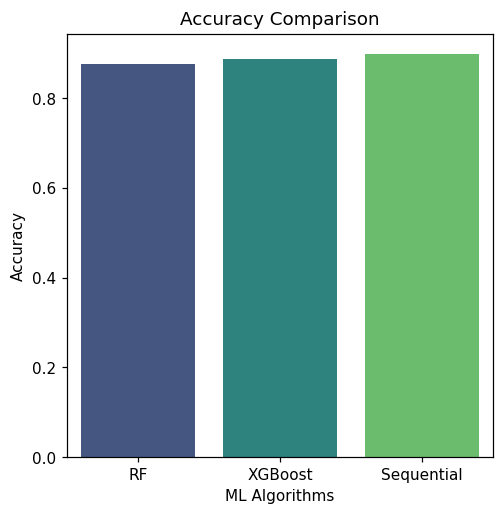

In [ ]:
plt.figure(figsize=[5,5],dpi = 110, facecolor='white')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('ML Algorithms')
sns.barplot(y = accList,x = modelList,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')